In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from IPython import display
import time
%matplotlib inline

In [2]:
data1 = sio.loadmat('data/kmeans2.mat')
x = data1['X']

In [3]:
def find_closest_centroids(x,centroids):
    x_expanded = np.expand_dims(x,axis=1)
    diff = np.sum((x_expanded - centroids)**2,axis=-1)
    ind = np.argmin(diff,axis=-1)
    return ind

def compute_centroids(x,ind,k):
    centroids=np.zeros((k,x.shape[1]))
    for i in range(k):
        centroids[i,:] = np.mean(x[np.where(ind==i)],axis=0)
    return centroids

In [4]:
#visualize
def visualize(x,centroids,ind, ax):
    _=sns.scatterplot(x[:,0],x[:,1],hue=ind,palette='viridis',legend=False,ax=ax)
    _=sns.scatterplot(centroids[:,0],centroids[:,1],marker='^', edgecolor='k', s=100, hue = np.arange(centroids.shape[0]),legend=False, palette='viridis',ax=ax)

In [12]:
def run_k_means(x,initial_centroids,max_iters):
    centroids = initial_centroids
    k = initial_centroids.shape[0]
    ind = find_closest_centroids(x,initial_centroids)
    fig = plt.figure(figsize=(10,8))
    ax = plt.gca()
    visualize(x,centroids,ind,ax)
    for iter in range(max_iters):
        ind = find_closest_centroids(x,centroids)
        centroids = compute_centroids(x,ind,k)
        visualize(x,centroids,ind,ax)
        display.display(plt.gcf())
        time.sleep(1.0)
        display.clear_output(wait=True)
        

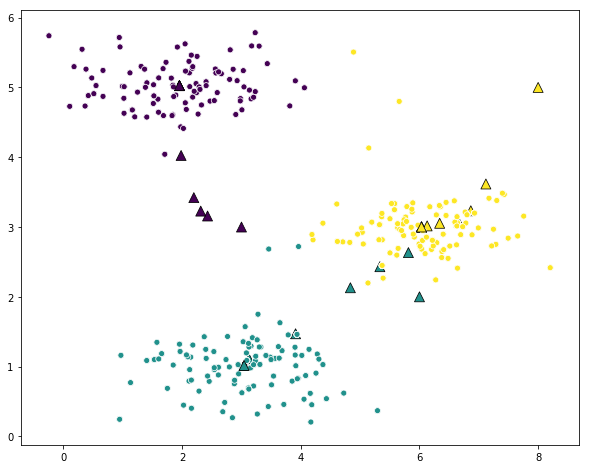

In [17]:
k = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters=10
run_k_means(x,initial_centroids,max_iters)